# Drawing a Map Background

####  Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

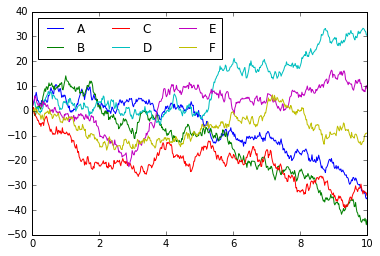

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='upper left');

In [3]:
# We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:
import seaborn as sns
sns.set()

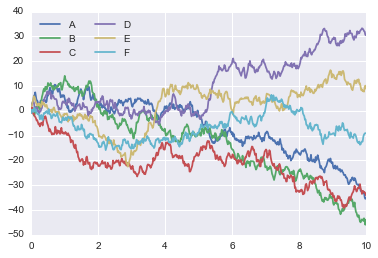

In [4]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# much better!

# Histograms, KDE, and densities

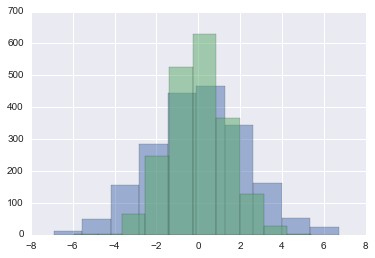

In [5]:
# plot histograms and joint distributions of variables in matplotlib
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)   # , normed=True   get error message

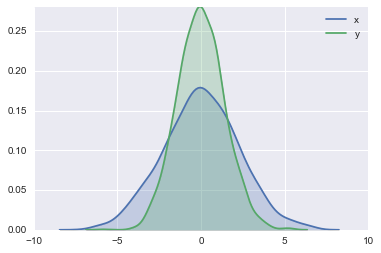

In [6]:
# Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, 
# which Seaborn does with sns.kdeplot:
for col in 'xy':
    sns.kdeplot(data[col], shade=True, kernel='gau')
# shade : bool, optional
#If True, shade in the area under the KDE curve (or draw with filled contours when data is bivariate).

/Users/chauncey_chen/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


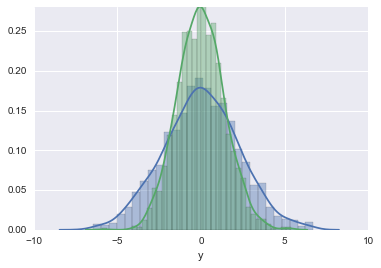

In [7]:
# Histograms and KDE can be combined using distplot:
sns.distplot(data['x'])
sns.distplot(data['y']);

/Users/chauncey_chen/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


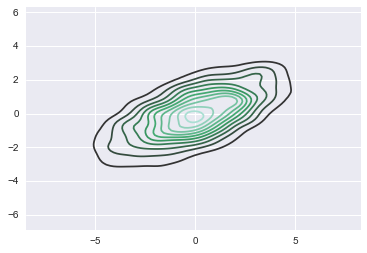

In [8]:
# If we pass the full two-dimensional dataset to kdeplot, 
# we will get a two-dimensional visualization of the data:
sns.kdeplot(data);


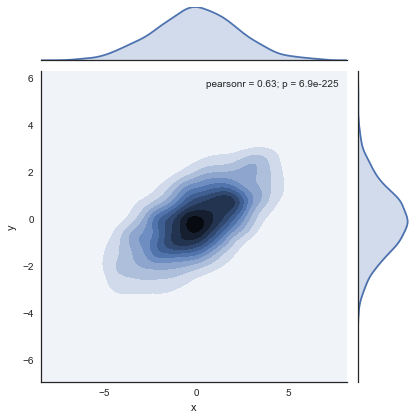

In [9]:
# marginal distributions 边缘分布
# pearsonr -> 皮尔森相关系数
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

/Users/chauncey_chen/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


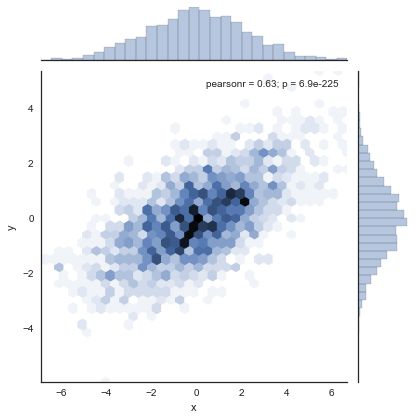

In [10]:
# There are other parameters that can be passed to jointplot—for example,
# we can use a hexagonally based histogram instead:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots

##### When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.
##### We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [11]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

## Faceted histograms

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# Subplot grid for plotting conditional relationships.
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

# https://seaborn.pydata.org/tutorial/axis_grids.html?highlight=map
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor plots

In [ ]:
# Factor plots can be useful for this kind of visualization as well. 
# This allows you to view the distribution of a parameter within bins defined by any other parameter:

with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint distributions

##### Similar to the pairplot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
# The joint plot can even do some automatic kernel density estimation and regression:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');   # kind='reg' -> regression
 

## Bar plots


In [ ]:
# Time series can be plotted using sns.factorplot.
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    # kind : {point, bar, count, box, violin, strip} The kind of plot to draw.
    
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
# We can learn more by looking at the method of discovery of each of these planets:
with sns.axes_style('white'):
    # Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches.
    # x, y, hue -> names of variables in data
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')


# Example: Exploring Marathon Finishing Times

In [ ]:
data = pd.read_csv('marathon-data.csv')   #马拉松数据
data.head()

In [ ]:
data.dtypes

In [ ]:
data['split'] = pd.to_timedelta(data['split'])
data['final'] = pd.to_timedelta(data['final'])
data.dtypes

In [ ]:
# That looks much better. 
# For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()


In [ ]:
# To get an idea of what the data looks like, we can plot a jointplot over the data:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')


###### The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

In [ ]:
# Let's create another column in the data, the split fraction, 
# which measures the degree to which each runner negative-splits or positive-splits the race:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

In [ ]:
# Where this split difference is less than zero, 
# the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
# Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.
sum(data.split_frac < 0)


In [ ]:
# Let's see whether there is any correlation between this split fraction and other variables. 
# We'll do this using a pairgrid, which draws plots of all these correlations:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# It looks like the split fraction does not correlate particularly with age, 
# but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.

###### The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.
###### A nice way to compare distributions is to use a violin plot

In [ ]:
# violin plot
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"]);

In [ ]:
# Let's look a little deeper, and compare these violin plots as a function of age. 
# We'll start by creating a new column in the array that specifies the decade of age that each person is in:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);


###### Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

###### Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [ ]:
(data.age > 80).sum()

###### Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use regplot, which will automatically fit a linear regression to the data:

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

###### Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.